In [1]:
from numpy import empty, zeros, max,copy, sin, pi,linspace
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')
%matplotlib notebook

# 9.1

In [10]:
L=1.
M=100
a=L/M#lattice spacing
rho0=1.
epsilon0=1.
target=1e-6

In [11]:
phi=zeros([M+1,M+1],float)
phiprime=empty([M+1,M+1],float)
rho=zeros([M+1,M+1],float)
#rho[20:41,60:81]=rho0
#rho[60:81,20:41]=-rho0
rho[(M+1)//2-10:(M+1)//2+10,(M+1)//2-10:(M+1)//2+10]=1

In [7]:
delta=1.
while delta>target:
    phiprime[0,:]=0.
    phiprime[M,:]=0.
    phiprime[:,0]=0.
    phiprime[:,M]=0.0
    phiprime[1:M,1:M]=(phi[0:M-1,1:M]+phi[2:M+1,1:M]+phi[1:M,0:M-1]+phi[1:M,2:M+1])/4\
    +rho[1:M,1:M]*a*a/(4*epsilon0)
    delta=max(abs(phi-phiprime))
    phi,phiprime=phiprime, phi

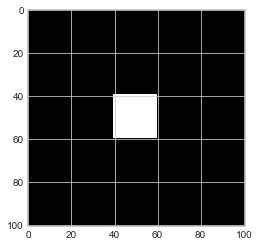

In [9]:
plt.imshow(rho)
plt.gray()
plt.show()

# Exercise 9.2

In [6]:
L=1.0
M=100
V=1.0
omega=0.9
target=1e-6


In [7]:
phi=zeros([M+1,M+1],float)
phi[0,:]=V
dphi=zeros([M+1,M+1],float)

In [8]:
delta=1.
while delta>target:
    for i in range(1,M):
        for j in range(1,M):
            dphi[i,j]=(1+omega)*((phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4-omega*phi[i,j])
            phi[i,j]+=dphi[i,j]
    delta=max(abs(dphi))
     
            

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:399: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/anaconda3/lib/python3.6/site-packages/matplotlib/image.py:404: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


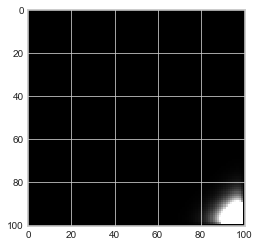

In [9]:
plt.imshow(phi)

plt.show()

In [10]:
L=0.1
N=100
a=L/N
clo=N//5
chi=4*N//5
omega=0.9

In [11]:
phi=zeros([N+1,N+1],float)
phi[clo:chi,clo]=1.
phi[clo:chi,chi]=-1.
dphi=zeros([N+1,N+1],float)
plates=zeros([N+1,N+1],int)
plates[clo:chi,clo]=1
plates[clo:chi,chi]=1


In [12]:
delta=1.
target=1e-6
while delta>target:
    
    for i in range(1,N):
        for j in range(1,N):
            if plates[i,j]==0:
                dphi[i,j]=(1+omega)*((phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4-phi[i,j])
                phi[i,j]+=dphi[i,j]
    delta=max(abs(dphi))
                

<IPython.core.display.Javascript object>


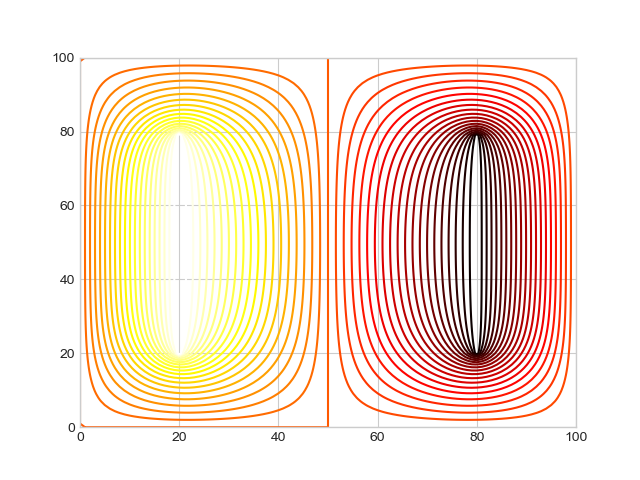

In [56]:
plt.contour(phi,40)
plt.set_cmap('hot')
plt.show()

In [13]:
L=20.0
N=100
a=L/N
h=0.01
D=0.1
A=10.
B=12.
D=0.1
tau=365
Tfixed=11.
tmax=10.01*365
steps=int(tmax/h)

s1=int(9.25*365/h)
s2=int(9.5*365/h)
s3=int(9.75*365/h)
s4=int(10.0*365/h)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 11.]


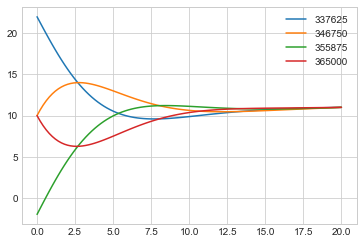

In [14]:
T=empty(N+1,float)
T[0:N]=A
T[N]=Tfixed

x=linspace(0.0,L,N+1)
for k in range(steps):
    t=k*h
    T[0]=A+B*sin(2*pi*t/tau)
    T[1:N]+=h*D*(T[0:N-1]+T[2:N+1]-2*T[1:N])/(a*a)
    if k==s1 or k==s2 or k==s3 or k==s4:
        plt.plot(x,T,label=k)
plt.legend()
plt.show()
